In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.io as pio
sb.set() # set the default Seaborn style for graphics
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)
pio.renderers.default = "svg"

In [2]:
rookiedata = pd.read_csv('rookie_data.csv')
rookiedata.head()

,index,Name,Hall of Fame Class,Year Drafted,GP,MIN,PTS,FGM,FGA,FG%,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,EFF
0,0,Jeff Taylor,NaN,1982.0,44.0,17.6,3.6,1.5,3.6,40.0,...,1.0,65.2,0.6,1.2,1.8,2.5,0.9,0.3,1.4,5.2
1,1,Charles Smith,NaN,1988.0,71.0,30.4,16.3,6.1,12.4,49.5,...,5.5,72.5,2.4,4.1,6.5,1.5,1.0,1.3,2.1,16.7
2,2,Mark Davis,NaN,1988.0,33.0,7.8,3.8,1.5,3.1,48.0,...,1.0,82.4,0.5,0.6,1.1,0.4,0.4,0.1,0.4,3.8
3,3,Charles Smith,NaN,1989.0,60.0,8.7,2.9,1.0,2.2,44.4,...,1.3,69.7,0.2,0.9,1.2,1.7,0.6,0.1,0.6,4.1
4,4,Michael Smith,NaN,1989.0,65.0,9.5,5.0,2.1,4.4,47.6,...,1.0,82.8,0.6,0.9,1.5,1.2,0.1,0.0,0.8,4.6


In [3]:
rookiedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2013 entries, 0 to 2012
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               2013 non-null   int64  
 1   Name                1537 non-null   object 
 2   Hall of Fame Class  26 non-null     float64
 3   Year Drafted        1537 non-null   float64
 4   GP                  1537 non-null   float64
 5   MIN                 1537 non-null   float64
 6   PTS                 1537 non-null   float64
 7   FGM                 1537 non-null   float64
 8   FGA                 1537 non-null   float64
 9   FG%                 1537 non-null   float64
 10  3P Made             1537 non-null   float64
 11  3PA                 1537 non-null   float64
 12  3P%                 1537 non-null   object 
 13  FTM                 1537 non-null   float64
 14  FTA                 1537 non-null   float64
 15  FT%                 1537 non-null   float64
 16  OREB  

We will first clean the data by removing the empty rows

In [4]:
rookiedata.dropna(subset=['Name'], inplace=True)

In [5]:
# Change the year drafted to type int64
rookiedata['Year Drafted'] = rookiedata['Year Drafted'].astype('int')
rookiedata.loc[rookiedata['3P%'] == '-', '3P%'] = 0
rookiedata['3P%'] = rookiedata['3P%'].astype('float64')

We will change the Hall of Fame class to indicate "1" if the player has made it into the hall of fame, and "0" if the player did not make it into the hall of fame.

In [6]:
# Making Hall of Fame  as True and False.
rookiedata.loc[rookiedata['Hall of Fame Class'].isnull() == False, 'Hall of Fame Class'] = 1
rookiedata.loc[rookiedata['Hall of Fame Class'].isnull() == True, 'Hall of Fame Class'] = 0
rookiedata['Hall of Fame Class'] = rookiedata['Hall of Fame Class'].astype('int')
rookiedata.rename(columns={"Hall of Fame Class": "Hall of Fame"}, inplace=True)

Now we will remove all duplicated names to effectively merge the two datasets using the names as the unique key.

In [7]:
rookiedata.drop_duplicates(subset=["Name"], keep=False, inplace=True, ignore_index=True)
rookiedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1526 entries, 0 to 1525
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         1526 non-null   int64  
 1   Name          1526 non-null   object 
 2   Hall of Fame  1526 non-null   int64  
 3   Year Drafted  1526 non-null   int64  
 4   GP            1526 non-null   float64
 5   MIN           1526 non-null   float64
 6   PTS           1526 non-null   float64
 7   FGM           1526 non-null   float64
 8   FGA           1526 non-null   float64
 9   FG%           1526 non-null   float64
 10  3P Made       1526 non-null   float64
 11  3PA           1526 non-null   float64
 12  3P%           1526 non-null   float64
 13  FTM           1526 non-null   float64
 14  FTA           1526 non-null   float64
 15  FT%           1526 non-null   float64
 16  OREB          1526 non-null   float64
 17  DREB          1526 non-null   float64
 18  REB           1526 non-null 

In [8]:
rookiedata

,index,Name,Hall of Fame,Year Drafted,GP,MIN,PTS,FGM,FGA,FG%,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,EFF
0,11,Andrew Toney,0,1980,75.0,23.6,12.9,5.3,10.7,49.5,...,3.0,71.2,0.4,1.5,1.9,3.6,0.8,0.1,2.9,10.2
1,12,Bill Hanzlik,0,1980,74.0,17.0,5.4,1.9,3.9,47.8,...,2.0,79.3,0.9,1.2,2.1,1.5,0.8,0.3,1.1,6.4
2,13,Bill Laimbeer,0,1980,81.0,30.4,9.8,4.2,8.3,50.3,...,1.9,76.5,3.3,5.3,8.6,2.7,0.7,1.0,1.6,16.5
3,14,Billy Reid,0,1980,59.0,10.1,3.2,1.4,3.1,45.4,...,0.7,56.4,0.5,0.6,1.0,1.2,0.6,0.1,1.3,2.8
4,15,Butch Carter,0,1980,54.0,12.4,5.6,2.1,4.6,46.2,...,1.8,73.7,0.6,0.6,1.2,1.0,0.4,0.0,0.9,4.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1521,1532,Taurean Prince,0,2016,20.0,10.0,3.4,1.2,3.1,39.3,...,0.7,85.7,0.2,1.8,2.0,0.7,0.3,0.3,0.7,4.0
1522,1533,Tomas Satoransky,0,2016,23.0,14.7,3.1,1.3,3.2,39.7,...,0.7,64.7,0.4,1.1,1.5,2.2,0.5,0.0,0.9,4.2
1523,1534,Troy Williams,0,2016,24.0,17.4,5.3,2.1,5.1,41.8,...,1.0,60.0,0.3,1.6,1.8,0.8,1.0,0.4,1.1,4.8
1524,1535,Wade Baldwin IV,0,2016,22.0,13.5,3.5,1.2,3.8,31.3,...,1.3,82.1,0.3,1.1,1.5,2.1,0.6,0.3,1.3,3.8


## Combining the two datasets

Since only retired players can be elected to be in the NBA hall of fame, we need to add in the year retired for each of the rookies in the dataset.

In [9]:
playerdata = pd.read_csv('player_data.csv')
playerdata.head()

,name,year_start,year_end,position,height,weight,birth_date,college
0,Alaa Abdelnaby,1991,1995,F-C,6-10,240.0,"June 24, 1968",Duke University
1,Zaid Abdul-Aziz,1969,1978,C-F,6-9,235.0,"April 7, 1946",Iowa State University
2,Kareem Abdul-Jabbar,1970,1989,C,7-2,225.0,"April 16, 1947","University of California, Los Angeles"
3,Mahmoud Abdul-Rauf,1991,2001,G,6-1,162.0,"March 9, 1969",Louisiana State University
4,Tariq Abdul-Wahad,1998,2003,F,6-6,223.0,"November 3, 1974",San Jose State University


In [10]:
# Create a new dataframe with name and year_end
df0 = playerdata[["name", "year_end"]].copy()
# Change the column names
df0.rename(columns={"name": "Name", "year_end": "Retired"}, inplace=True)
# Remove null values
df0.dropna(subset=['Name'], inplace=True)
# Remove duplicates
df0.drop_duplicates(subset=["Name"], keep=False, inplace=True)

Since we are only interested in whether or not the player is retired, we can modify the "Retired" column to indicate True if the player is retired and False if the player is not retired.

In [11]:
df0.loc[df0['Retired'] == 2018, 'Retired'] = 0
df0.loc[df0['Retired'] != 0, 'Retired'] = 1
df0['Retired'] = df0['Retired'].astype('int')

In [12]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4453 entries, 0 to 4549
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Name     4453 non-null   object
 1   Retired  4453 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 104.4+ KB


In [13]:
rookiedata = rookiedata.merge(df0, left_on=["Name"], right_on=["Name"])
rookiedata

,index,Name,Hall of Fame,Year Drafted,GP,MIN,PTS,FGM,FGA,FG%,...,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,EFF,Retired
0,11,Andrew Toney,0,1980,75.0,23.6,12.9,5.3,10.7,49.5,...,71.2,0.4,1.5,1.9,3.6,0.8,0.1,2.9,10.2,1
1,12,Bill Hanzlik,0,1980,74.0,17.0,5.4,1.9,3.9,47.8,...,79.3,0.9,1.2,2.1,1.5,0.8,0.3,1.1,6.4,1
2,13,Bill Laimbeer,0,1980,81.0,30.4,9.8,4.2,8.3,50.3,...,76.5,3.3,5.3,8.6,2.7,0.7,1.0,1.6,16.5,1
3,14,Billy Reid,0,1980,59.0,10.1,3.2,1.4,3.1,45.4,...,56.4,0.5,0.6,1.0,1.2,0.6,0.1,1.3,2.8,1
4,15,Butch Carter,0,1980,54.0,12.4,5.6,2.1,4.6,46.2,...,73.7,0.6,0.6,1.2,1.0,0.4,0.0,0.9,4.3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1457,1529,Rodney McGruder,0,2016,30.0,25.7,5.8,2.1,5.3,40.0,...,72.4,1.5,2.0,3.5,1.5,0.7,0.3,0.7,7.5,1
1458,1530,Semaj Christon,0,2016,33.0,15.6,3.0,1.3,4.0,31.8,...,52.9,0.4,1.0,1.4,2.5,0.4,0.1,0.7,3.7,1
1459,1533,Tomas Satoransky,0,2016,23.0,14.7,3.1,1.3,3.2,39.7,...,64.7,0.4,1.1,1.5,2.2,0.5,0.0,0.9,4.2,0
1460,1534,Troy Williams,0,2016,24.0,17.4,5.3,2.1,5.1,41.8,...,60.0,0.3,1.6,1.8,0.8,1.0,0.4,1.1,4.8,0


## Let's do some data visualization to know our data better

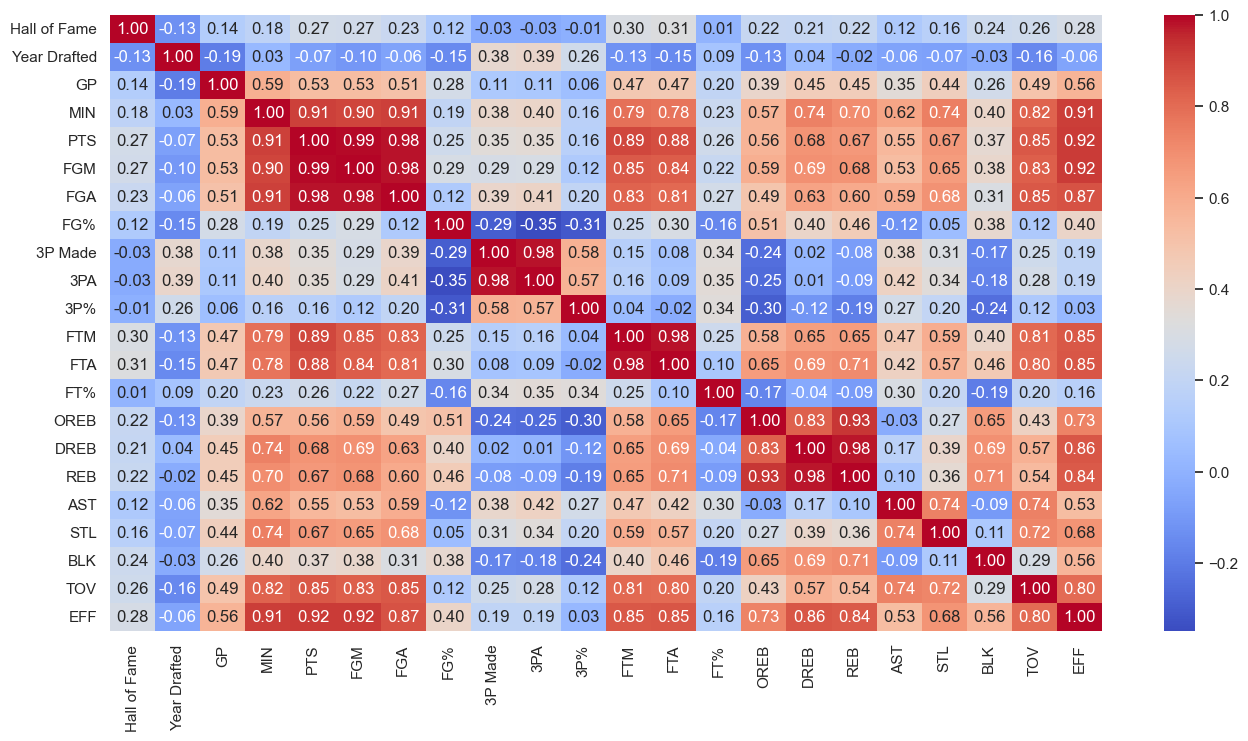

In [14]:
# Select variables of interest
nba_vars = rookiedata.loc[:, 'Name':'EFF']

# Compute the correlation matrix
corr = nba_vars.corr()

# Create a heatmap with the correlation matrix
fig, ax = plt.subplots(figsize=(16, 8))
sb.heatmap(corr, cmap='coolwarm', annot=True, fmt='.2f', ax=ax)

# Show the plot
plt.show()

In [15]:
# Select variables of interest
nba_vars = rookiedata.loc[:, 'Name':'EFF']

# Compute the correlation matrix
corr = nba_vars.corr()

# Get the top 5 highest correlations with the 'HOF' variable
top_corr = corr['Hall of Fame'].sort_values(ascending=False)[1:6]

# Print the results
print(top_corr)

FTA    0.314928
FTM    0.301131
EFF    0.284246
PTS    0.271857
FGM    0.265879
Name: Hall of Fame, dtype: float64


In [16]:
# Filter the data to select only hall of fame players
hof_players = rookiedata[rookiedata['Hall of Fame'] == 1]

# Print the list of hall of fame players
hof_players

,index,Name,Hall of Fame,Year Drafted,GP,MIN,PTS,FGM,FGA,FG%,...,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,EFF,Retired
21,34,Kevin McHale,1,1980,82.0,20.1,10.0,4.3,8.1,53.3,...,67.9,1.9,2.5,4.4,0.7,0.3,1.8,1.3,11.4,1
58,74,Isiah Thomas,1,1981,72.0,33.8,17.0,6.3,14.8,42.4,...,70.4,0.8,2.1,2.9,7.8,2.1,0.2,4.2,15.6,1
92,111,Dominique Wilkins,1,1982,82.0,32.9,17.5,7.3,14.9,49.3,...,68.2,2.8,3.1,5.8,1.6,1.0,0.8,2.2,15.6,1
95,115,James Worthy,1,1982,77.0,25.6,13.4,5.8,10.0,57.9,...,62.4,2.0,3.1,5.2,1.7,1.2,0.8,2.3,14.7,1
124,147,Clyde Drexler,1,1983,82.0,17.2,7.7,3.1,6.8,45.1,...,72.8,1.4,1.5,2.9,1.9,1.3,0.3,1.5,8.2,1
145,168,Ralph Sampson,1,1983,82.0,32.8,21.0,8.7,16.7,52.3,...,66.1,3.6,7.6,11.1,2.0,0.8,2.4,3.6,24.0,1
162,185,Charles Barkley,1,1984,82.0,28.6,14.0,5.2,9.5,54.5,...,73.3,3.2,5.3,8.6,1.9,1.2,1.0,2.5,18.4,1
169,194,Hakeem Olajuwon,1,1984,82.0,35.5,20.6,8.3,15.3,53.8,...,61.3,5.4,6.5,11.9,1.4,1.2,2.7,2.9,25.2,1
174,199,John Stockton,1,1984,82.0,18.2,5.6,1.9,4.1,47.1,...,73.6,0.3,1.0,1.3,5.1,1.3,0.1,1.8,8.8,1
181,208,Michael Jordan,1,1984,82.0,38.3,28.2,10.2,19.8,51.5,...,84.5,2.0,4.5,6.5,5.9,2.4,0.8,3.5,29.2,1


## As we can see, a total of 23 players from 1461 players got into Hall of Fame. Let's do some data visualization based on these 23 outstanding players.

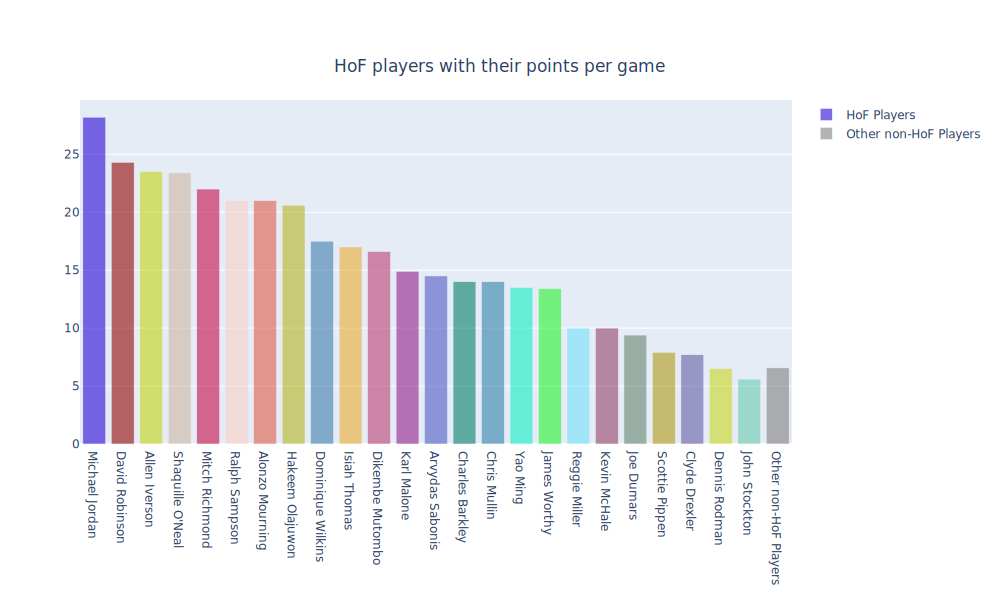

In [17]:
import random

# function to generate random colors
def random_colors(number_of_colors):
    color = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
                 for i in range(number_of_colors)]
    return color

# sort the DataFrame by PTS in descending order and select top 25 rows
sorted_players = hof_players.sort_values('PTS', ascending=False).head(25)

# calculate the average PTS for players not in HoF
avg_pts = rookiedata[~rookiedata['Name'].isin(hof_players['Name'])]['PTS'].mean()

# create trace for HoF players
trace0 = go.Bar(
    x=sorted_players['Name'].head(25),
    y=sorted_players['PTS'].head(25),
    marker=dict(
        color= random_colors(25),
    ),
    opacity=0.6,
    name='HoF Players'
)

# create trace for other players
trace1 = go.Bar(
    x=['Other non-HoF Players'],
    y=[avg_pts],
    marker=dict(
        color= 'grey',
    ),
    opacity=0.6,
    name='Other non-HoF Players'
)

# combine the traces into a data list
data = [trace0, trace1]

# create the layout
layout = go.Layout(
    title={
        'text': 'HoF players with their points per game',
        'x': 0.5,
        'y': 0.9,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    height = 600,
    width = 1000
)

# create the figure and display it
fig = go.Figure(data=data, layout=layout)
fig.show()

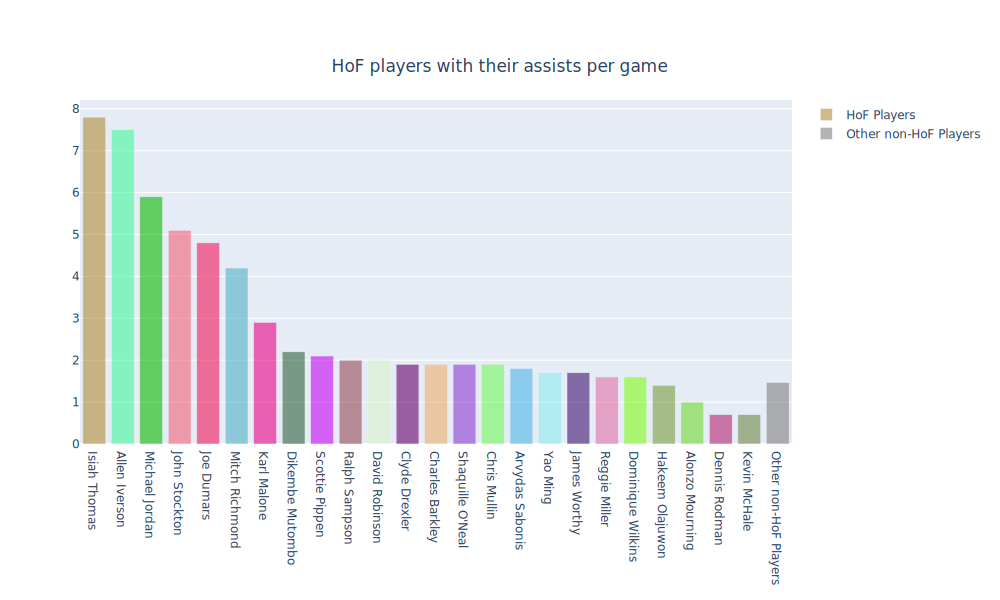

In [18]:
# sort the DataFrame by PTS in descending order and select top 25 rows
sorted_players = hof_players.sort_values('AST', ascending=False).head(25)

# calculate the average PTS for players not in HoF
avg_pts = rookiedata[~rookiedata['Name'].isin(hof_players['Name'])]['AST'].mean()

# create trace for HoF players
trace0 = go.Bar(
    x=sorted_players['Name'].head(25),
    y=sorted_players['AST'].head(25),
    marker=dict(
        color= random_colors(25),
    ),
    opacity=0.6,
    name='HoF Players'
)

# create trace for other players
trace1 = go.Bar(
    x=['Other non-HoF Players'],
    y=[avg_pts],
    marker=dict(
        color= 'grey',
    ),
    opacity=0.6,
    name='Other non-HoF Players'
)

# combine the traces into a data list
data = [trace0, trace1]

# create the layout
layout = go.Layout(
    title={
        'text': 'HoF players with their assists per game',
        'x': 0.5,
        'y': 0.9,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    height = 600,
    width = 1000
)

# create the figure and display it
fig = go.Figure(data=data, layout=layout)
fig.show()

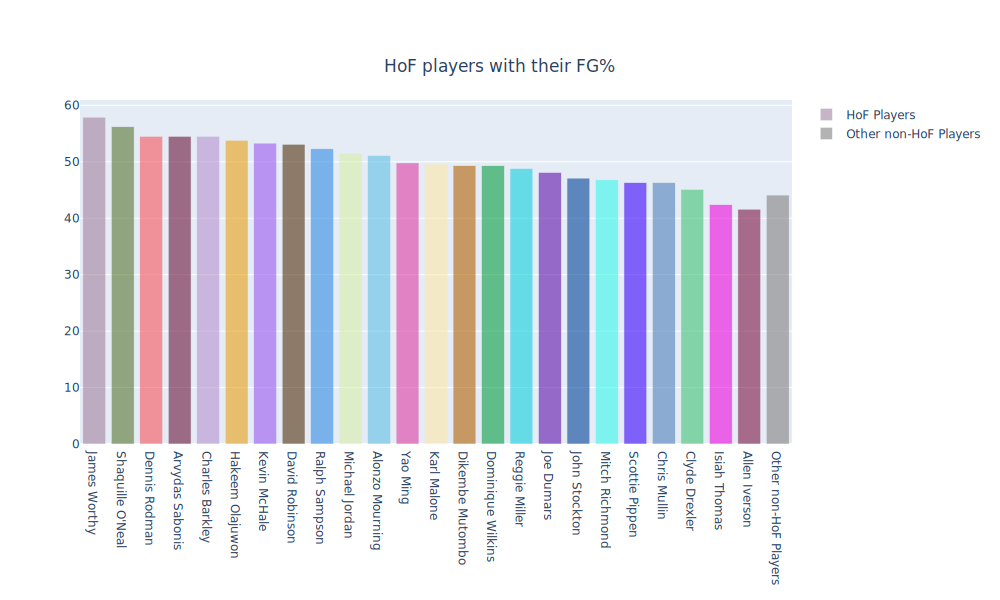

In [19]:
# sort the DataFrame by PTS in descending order and select top 25 rows
sorted_players = hof_players.sort_values('FG%', ascending=False).head(25)

# calculate the average PTS for players not in HoF
avg_pts = rookiedata[~rookiedata['Name'].isin(hof_players['Name'])]['FG%'].mean()

# create trace for HoF players
trace0 = go.Bar(
    x=sorted_players['Name'].head(25),
    y=sorted_players['FG%'].head(25),
    marker=dict(
        color= random_colors(25),
    ),
    opacity=0.6,
    name='HoF Players'
)

# create trace for other players
trace1 = go.Bar(
    x=['Other non-HoF Players'],
    y=[avg_pts],
    marker=dict(
        color= 'grey',
    ),
    opacity=0.6,
    name='Other non-HoF Players'
)

# combine the traces into a data list
data = [trace0, trace1]

# create the layout
layout = go.Layout(
    title={
        'text': 'HoF players with their FG%',
        'x': 0.5,
        'y': 0.9,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    height = 600,
    width = 1000
)

# create the figure and display it
fig = go.Figure(data=data, layout=layout)
fig.show()

### As we can see, generally, HoF players have higher PTS, FG%, Assits per game, than the non-HoF players.

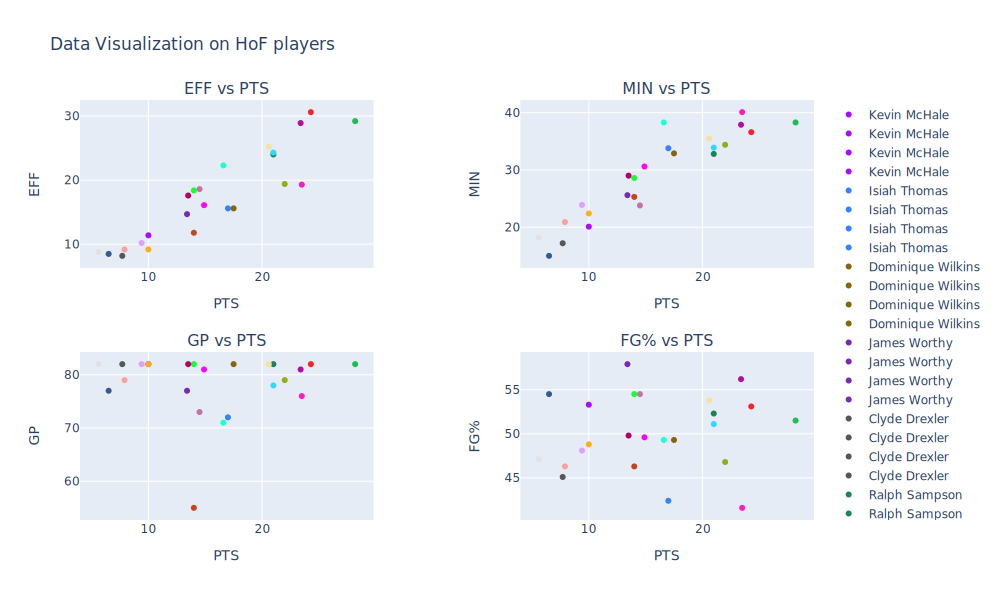

In [20]:
# create subplots with 2 rows and 2 columns
fig = make_subplots(rows=2, cols=2, 
                    subplot_titles=['EFF vs PTS', 'MIN vs PTS', 'GP vs PTS', 'FG% vs PTS'], 
                    specs=[[{'rowspan': 1, 'colspan': 1}, {'rowspan': 1, 'colspan': 1}], 
                           [{'rowspan': 1, 'colspan': 1}, {'rowspan': 1, 'colspan': 1}]], 
                    horizontal_spacing=0.2, vertical_spacing=0.2)

# define colors for each player
colors = px.colors.qualitative.Alphabet[:len(hof_players)]

# loop through the players and add each scatter plot to a subplot
for i, player in enumerate(hof_players['Name']):
    fig.add_trace(
        go.Scatter(x=hof_players[hof_players['Name']==player]['PTS'],
                   y=hof_players[hof_players['Name']==player]['EFF'],
                   mode='markers',
                   name=player,
                   marker=dict(color=colors[i])
        ),
        row=1, col=1
    )
    fig.add_trace(
        go.Scatter(x=hof_players[hof_players['Name']==player]['PTS'],
                   y=hof_players[hof_players['Name']==player]['MIN'],
                   mode='markers',
                   name=player,
                   marker=dict(color=colors[i])
        ),
        row=1, col=2
    )
    fig.add_trace(
        go.Scatter(x=hof_players[hof_players['Name']==player]['PTS'],
                   y=hof_players[hof_players['Name']==player]['GP'],
                   mode='markers',
                   name=player,
                   marker=dict(color=colors[i])
        ),
        row=2, col=1
    )
    fig.add_trace(
        go.Scatter(x=hof_players[hof_players['Name']==player]['PTS'],
                   y=hof_players[hof_players['Name']==player]['FG%'],
                   mode='markers',
                   name=player,
                   marker=dict(color=colors[i])
        ),
        row=2, col=2
    )

# update subplot layout and axis titles
fig.update_layout(title='Data Visualization on HoF players',height = 600,width = 1000)
fig.update_xaxes(title_text='PTS')
fig.update_yaxes(title_text='EFF', row=1, col=1)
fig.update_yaxes(title_text='MIN', row=1, col=2)
fig.update_yaxes(title_text='GP', row=2, col=1)
fig.update_yaxes(title_text='FG%', row=2, col=2)

# show the plot
fig.show()

### As we can see, green colour dot : Michael Jordan is always on the top right, indicating he is one of the top performing players among the Hall of Fame. The left bottom grey colour dot, deem as one of the lowest performing players, John Stockton, can be viewed as the margin line to enter the Hall of Fame. Other rookie players are expected to perform better than the margin line in order to enter Hall of Fame

## Splitting the data

We will now split the data into two: retired and non-retired players, because only retired players can make it into the hall of fame. We will subsequently use the model to determine if these non-retired players will make it into the hall of fame based on their rookie statistics.

In [21]:
rookiedata_retired = rookiedata.drop(rookiedata[rookiedata['Retired'] == 0].index)
rookiedata_active = rookiedata.drop(rookiedata[rookiedata['Retired'] == 1].index)

In [22]:
rookiedata_retired.reset_index(drop=True, inplace=True)
rookiedata_retired.drop(columns="Name", inplace=True)
rookiedata_retired

,index,Hall of Fame,Year Drafted,GP,MIN,PTS,FGM,FGA,FG%,3P Made,...,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,EFF,Retired
0,11,0,1980,75.0,23.6,12.9,5.3,10.7,49.5,0.1,...,71.2,0.4,1.5,1.9,3.6,0.8,0.1,2.9,10.2,1
1,12,0,1980,74.0,17.0,5.4,1.9,3.9,47.8,0.0,...,79.3,0.9,1.2,2.1,1.5,0.8,0.3,1.1,6.4,1
2,13,0,1980,81.0,30.4,9.8,4.2,8.3,50.3,0.0,...,76.5,3.3,5.3,8.6,2.7,0.7,1.0,1.6,16.5,1
3,14,0,1980,59.0,10.1,3.2,1.4,3.1,45.4,0.0,...,56.4,0.5,0.6,1.0,1.2,0.6,0.1,1.3,2.8,1
4,15,0,1980,54.0,12.4,5.6,2.1,4.6,46.2,0.1,...,73.7,0.6,0.6,1.2,1.0,0.4,0.0,0.9,4.3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1186,1468,0,2015,57.0,12.2,5.0,2.0,4.9,41.0,0.6,...,79.2,0.2,1.3,1.5,1.9,0.6,0.1,0.8,5.4,1
1187,1486,0,2015,35.0,11.3,2.4,0.8,2.3,35.0,0.3,...,72.7,0.1,1.3,1.4,1.1,0.3,0.1,0.7,2.9,1
1188,1488,0,2015,53.0,16.4,4.5,1.8,4.3,42.2,0.3,...,93.1,0.3,1.4,1.7,3.4,0.5,0.1,1.5,6.2,1
1189,1529,0,2016,30.0,25.7,5.8,2.1,5.3,40.0,0.8,...,72.4,1.5,2.0,3.5,1.5,0.7,0.3,0.7,7.5,1


In [23]:
rookiedata_active.reset_index(drop=True, inplace=True)
rookiedata_active

,index,Name,Hall of Fame,Year Drafted,GP,MIN,PTS,FGM,FGA,FG%,...,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,EFF,Retired
0,775,Dirk Nowitzki,0,1998,47.0,20.4,8.2,2.9,7.1,40.5,...,77.3,0.9,2.6,3.4,1.0,0.6,0.6,1.6,7.4,0
1,801,Vince Carter,0,1998,50.0,35.2,18.3,6.9,15.3,45.0,...,76.1,1.9,3.8,5.7,3.0,1.1,1.5,2.2,17.6,0
2,816,Jason Terry,0,1999,81.0,23.3,8.1,3.1,7.4,41.5,...,80.7,0.3,1.8,2.0,4.3,1.1,0.1,1.9,9.1,0
3,851,Jamal Crawford,0,2000,61.0,17.2,4.6,1.8,5.0,35.2,...,79.4,0.1,1.3,1.5,2.3,0.7,0.2,1.4,4.6,0
4,885,Joe Johnson,0,2001,77.0,24.9,7.5,3.3,7.6,43.0,...,77.4,1.0,2.4,3.3,2.3,0.8,0.3,0.9,8.8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266,1527,Pascal Siakam,0,2016,32.0,17.8,5.1,2.3,4.3,52.5,...,77.3,1.3,2.2,3.5,0.4,0.5,0.8,0.7,7.4,0
267,1528,Patrick McCaw,0,2016,26.0,12.2,2.8,1.1,2.8,38.9,...,50.0,0.3,0.8,1.0,1.0,0.4,0.3,0.6,3.2,0
268,1533,Tomas Satoransky,0,2016,23.0,14.7,3.1,1.3,3.2,39.7,...,64.7,0.4,1.1,1.5,2.2,0.5,0.0,0.9,4.2,0
269,1534,Troy Williams,0,2016,24.0,17.4,5.3,2.1,5.1,41.8,...,60.0,0.3,1.6,1.8,0.8,1.0,0.4,1.1,4.8,0


## Resolving the Imbalance

In [24]:
print(rookiedata_retired.groupby('Hall of Fame').size())

Hall of Fame
0    1167
1      24
dtype: int64


We realise that the data is heavily skewed and highly imbalanced.

Majority (1167 count) is not in the hall of fame while only 24 count belongs in the hall of fame.

We are going to look at 3 techniques to resolve this imbalance:

Method 1: Undersampling
Method 2: Oversampling
Method 3: SMOTE

## Undersampling
### Reducing the data by eliminating examples belonging to the majority class with the objective of equalizing the number of examples of each class

In [25]:
#split into X and y
dfy = rookiedata_retired[['Hall of Fame']]
dfX = rookiedata_retired.drop(['Hall of Fame','Retired'], axis=1)

<Figure size 1600x800 with 0 Axes>

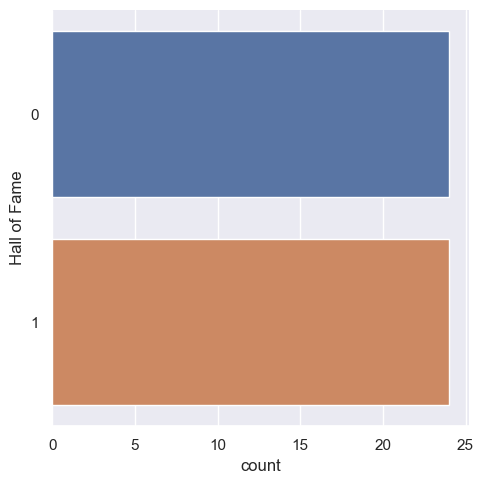

In [26]:
from imblearn.under_sampling import RandomUnderSampler
undersample = RandomUnderSampler(sampling_strategy='majority')
X_US, y_US = undersample.fit_resample(dfX, dfy)

f = plt.figure(figsize=(16, 8))
sb.catplot(y = "Hall of Fame", data = y_US, kind = "count")

In [27]:
# New dataset will be balanced with same number of Hall of Fame = 1 and Hall of Fame = 0
data_US = pd.concat([X_US, y_US], axis=1)
data_US.head()

,index,Year Drafted,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,...,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,EFF,Hall of Fame
0,999,2004,25.0,14.2,3.7,1.4,3.8,36.2,0.7,2.2,...,77.8,0.3,1.2,1.4,0.7,0.6,0.0,0.4,3.6,0
1,721,1996,80.0,35.0,18.7,6.9,15.2,45.3,0.1,0.3,...,74.6,2.7,4.2,6.9,2.2,1.0,1.0,2.8,17.0,0
2,394,1989,82.0,19.1,9.1,3.6,9.2,39.7,0.1,0.5,...,55.0,1.3,2.4,3.8,0.9,0.7,0.7,1.6,6.5,0
3,1265,2010,60.0,14.5,4.3,1.9,4.5,43.3,0.0,0.0,...,56.0,1.0,2.0,3.0,0.3,0.4,1.2,0.6,5.6,0
4,201,1984,51.0,10.5,3.8,1.6,3.7,44.0,0.0,0.0,...,75.0,0.8,0.8,1.6,0.7,0.2,0.2,0.6,3.7,0


In [28]:
#check count
print(data_US.groupby('Hall of Fame').size())

Hall of Fame
0    24
1    24
dtype: int64


Disadvantage: The deletion of observations in this random manner may lead to the deletion of some very useful information from the dataset

## Oversampling
### Random over-sampling is a technique that randomly samples a number of observations from the minority class (sampling is done with replacement) and adds them to the dataset.

<Figure size 1600x800 with 0 Axes>

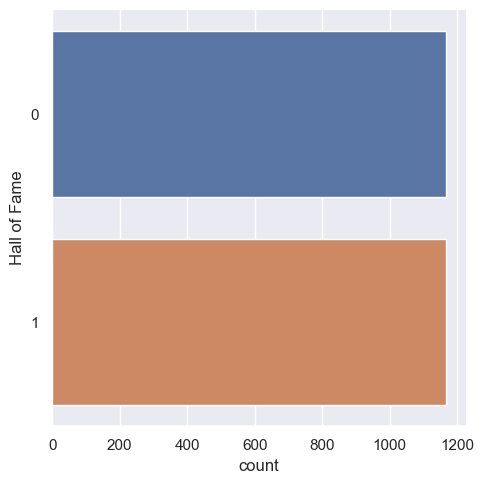

In [29]:
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler(sampling_strategy='minority')
X_OS, y_OS = oversample.fit_resample(dfX, dfy)

f = plt.figure(figsize=(16, 8))
sb.catplot(y = "Hall of Fame", data = y_OS, kind = "count")

In [30]:
#new dataset will be balanced with same number of isfraud=1 and isfraud=0
data_OS = pd.concat([X_OS, y_OS], axis=1)
data_OS.head()

,index,Year Drafted,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,...,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,EFF,Hall of Fame
0,11,1980,75.0,23.6,12.9,5.3,10.7,49.5,0.1,0.4,...,71.2,0.4,1.5,1.9,3.6,0.8,0.1,2.9,10.2,0
1,12,1980,74.0,17.0,5.4,1.9,3.9,47.8,0.0,0.1,...,79.3,0.9,1.2,2.1,1.5,0.8,0.3,1.1,6.4,0
2,13,1980,81.0,30.4,9.8,4.2,8.3,50.3,0.0,0.0,...,76.5,3.3,5.3,8.6,2.7,0.7,1.0,1.6,16.5,0
3,14,1980,59.0,10.1,3.2,1.4,3.1,45.4,0.0,0.1,...,56.4,0.5,0.6,1.0,1.2,0.6,0.1,1.3,2.8,0
4,15,1980,54.0,12.4,5.6,2.1,4.6,46.2,0.1,0.2,...,73.7,0.6,0.6,1.2,1.0,0.4,0.0,0.9,4.3,0


In [31]:
#check count
print(data_OS.groupby('Hall of Fame').size())

Hall of Fame
0    1167
1    1167
dtype: int64


Disadvantage: This technique may increase the chance of model overfitting.

## SMOTE
### SMOTE is a technique that generates new observations by interpolating between observations in the original dataset. Implementing SMOTE on our imbalanced dataset helped us with the imbalance of our labels.

<Figure size 1600x800 with 0 Axes>

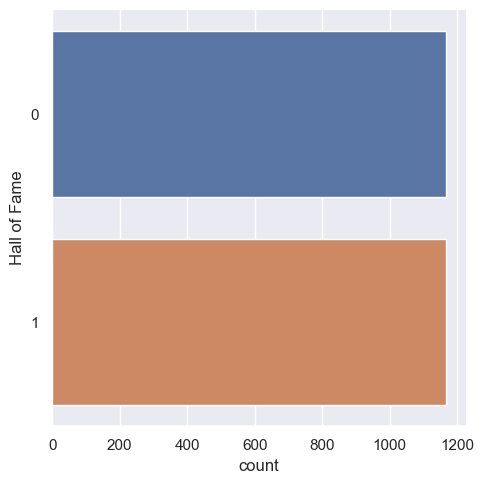

In [32]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_SM, y_SM = smote.fit_resample(dfX, dfy)

f = plt.figure(figsize=(16, 8))
sb.catplot(y = "Hall of Fame", data = y_SM, kind = "count")

In [33]:
#new dataset will be balanced with same number of Hall of Fame = True and Hall of Fame = False
data_SM = pd.concat([X_SM, y_SM], axis=1)
data_SM.head()

,index,Year Drafted,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,...,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,EFF,Hall of Fame
0,11,1980,75.0,23.6,12.9,5.3,10.7,49.5,0.1,0.4,...,71.2,0.4,1.5,1.9,3.6,0.8,0.1,2.9,10.2,0
1,12,1980,74.0,17.0,5.4,1.9,3.9,47.8,0.0,0.1,...,79.3,0.9,1.2,2.1,1.5,0.8,0.3,1.1,6.4,0
2,13,1980,81.0,30.4,9.8,4.2,8.3,50.3,0.0,0.0,...,76.5,3.3,5.3,8.6,2.7,0.7,1.0,1.6,16.5,0
3,14,1980,59.0,10.1,3.2,1.4,3.1,45.4,0.0,0.1,...,56.4,0.5,0.6,1.0,1.2,0.6,0.1,1.3,2.8,0
4,15,1980,54.0,12.4,5.6,2.1,4.6,46.2,0.1,0.2,...,73.7,0.6,0.6,1.2,1.0,0.4,0.0,0.9,4.3,0


In [34]:
#check count
print(data_SM.groupby('Hall of Fame').size())

Hall of Fame
0    1167
1    1167
dtype: int64


### We will decide which method to adopt by looking at the correlation between Hall of Fame and EFF after each method through a scatterplot graph.

,index,Year Drafted,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,...,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,EFF,Hall of Fame
index,1.000000,0.999320,-0.453573,-0.183669,-0.256352,-0.299428,-0.245737,-0.197038,0.393632,0.388185,...,0.059902,-0.277825,-0.105829,-0.168141,-0.152069,-0.287570,-0.128833,-0.311087,-0.242087,-0.496887
Year Drafted,0.999320,1.000000,-0.456987,-0.188631,-0.261774,-0.305386,-0.250223,-0.203240,0.397925,0.392543,...,0.062608,-0.284142,-0.112706,-0.175030,-0.152053,-0.282624,-0.134052,-0.318191,-0.247571,-0.496341
GP,-0.453573,-0.456987,1.000000,0.691233,0.637416,0.650619,0.630845,0.387993,-0.002250,-0.033129,...,-0.072607,0.598984,0.550894,0.584298,0.369060,0.509162,0.448472,0.623912,0.662028,0.643011
MIN,-0.183669,-0.188631,0.691233,1.000000,0.935253,0.924389,0.935676,0.269296,0.268768,0.255852,...,0.079772,0.709533,0.756797,0.760697,0.578860,0.686360,0.580347,0.901767,0.914142,0.621008
PTS,-0.256352,-0.261774,0.637416,0.935253,1.000000,0.991898,0.978897,0.349911,0.176633,0.165716,...,0.121773,0.695732,0.747448,0.749857,0.535161,0.675782,0.612464,0.914548,0.951386,0.664020
FGM,-0.299428,-0.305386,0.650619,0.924389,0.991898,1.000000,0.976977,0.386824,0.134807,0.121801,...,0.064181,0.713574,0.749719,0.757653,0.502472,0.657045,0.609758,0.910627,0.942599,0.676242
FGA,-0.245737,-0.250223,0.630845,0.935676,0.978897,0.976977,1.000000,0.219994,0.281419,0.271414,...,0.102463,0.616024,0.669497,0.668679,0.603228,0.706758,0.507155,0.922084,0.885176,0.606978
FG%,-0.197038,-0.203240,0.387993,0.269296,0.349911,0.386824,0.219994,1.000000,-0.385139,-0.422482,...,-0.100872,0.551564,0.465922,0.512266,-0.124592,0.059885,0.492675,0.253982,0.488816,0.501081
3P Made,0.393632,0.397925,-0.002250,0.268768,0.176633,0.134807,0.281419,-0.385139,1.000000,0.991921,...,0.210579,-0.228834,-0.096421,-0.147198,0.510151,0.343925,-0.267600,0.191967,0.037522,-0.093845
3PA,0.388185,0.392543,-0.033129,0.255852,0.165716,0.121801,0.271414,-0.422482,0.991921,1.000000,...,0.210070,-0.251023,-0.120249,-0.170964,0.514602,0.363030,-0.296203,0.185741,0.019594,-0.103683


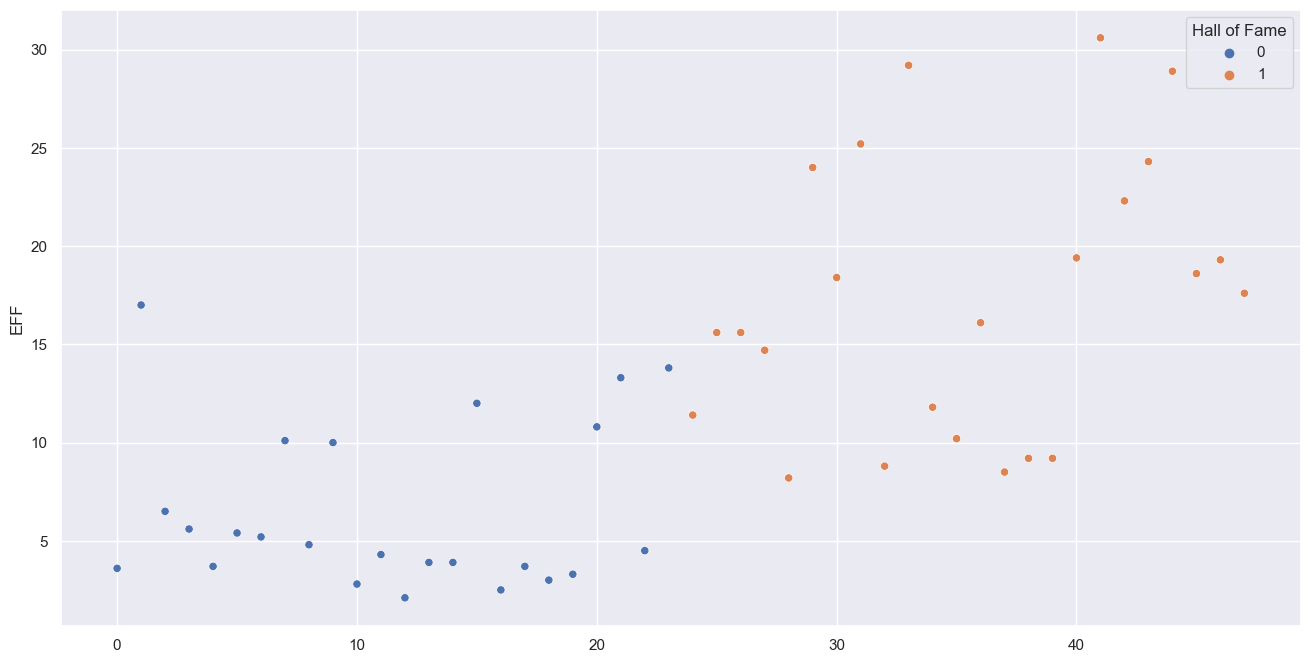

In [35]:
f = plt.figure(figsize=(16, 8))
sb.scatterplot(data=data_US, x=data_US.index, y='EFF', hue='Hall of Fame')
data_US.corr()

Correlation between **EFF** and **Hall of Fame** = **0.692**

,index,Year Drafted,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,...,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,EFF,Hall of Fame
index,1.000000,0.999236,-0.413862,-0.249226,-0.305235,-0.344834,-0.310754,-0.342031,0.332498,0.327153,...,0.069250,-0.254163,-0.117777,-0.168208,-0.221857,-0.351739,-0.125261,-0.329471,-0.279168,-0.471301
Year Drafted,0.999236,1.000000,-0.413440,-0.251130,-0.307529,-0.347298,-0.312850,-0.342606,0.332119,0.326800,...,0.071836,-0.255574,-0.122319,-0.171790,-0.222693,-0.348092,-0.128360,-0.332733,-0.281704,-0.469102
GP,-0.413862,-0.413440,1.000000,0.636228,0.579362,0.595741,0.569303,0.492041,-0.004020,-0.016645,...,0.101203,0.495747,0.469247,0.490596,0.350068,0.444677,0.371990,0.564871,0.599129,0.598373
MIN,-0.249226,-0.251130,0.636228,1.000000,0.932959,0.926709,0.936804,0.408632,0.158775,0.164160,...,0.121546,0.716949,0.750276,0.757693,0.543474,0.641210,0.589908,0.901868,0.912311,0.625225
PTS,-0.305235,-0.307529,0.579362,0.932959,1.000000,0.991330,0.981243,0.463190,0.111777,0.118757,...,0.148712,0.712604,0.753628,0.758299,0.481151,0.636364,0.617985,0.896450,0.954144,0.670548
FGM,-0.344834,-0.347298,0.595741,0.926709,0.991330,1.000000,0.982906,0.496860,0.068333,0.074318,...,0.096280,0.733126,0.757130,0.767720,0.449743,0.619181,0.611031,0.889663,0.944696,0.676632
FGA,-0.310754,-0.312850,0.569303,0.936804,0.981243,0.982906,1.000000,0.364826,0.178478,0.191322,...,0.140774,0.652309,0.684893,0.690116,0.539933,0.665006,0.526927,0.903388,0.898408,0.634628
FG%,-0.342031,-0.342606,0.492041,0.408632,0.463190,0.496860,0.364826,1.000000,-0.319459,-0.351636,...,-0.136079,0.610838,0.554787,0.590780,-0.081523,0.144894,0.511703,0.348640,0.571055,0.510992
3P Made,0.332498,0.332119,-0.004020,0.158775,0.111777,0.068333,0.178478,-0.319459,1.000000,0.990008,...,0.252523,-0.254115,-0.176093,-0.208713,0.362681,0.214217,-0.264399,0.108364,-0.033329,-0.088791
3PA,0.327153,0.326800,-0.016645,0.164160,0.118757,0.074318,0.191322,-0.351636,0.990008,1.000000,...,0.260748,-0.271584,-0.194860,-0.227622,0.396009,0.252421,-0.285496,0.119579,-0.035942,-0.092685


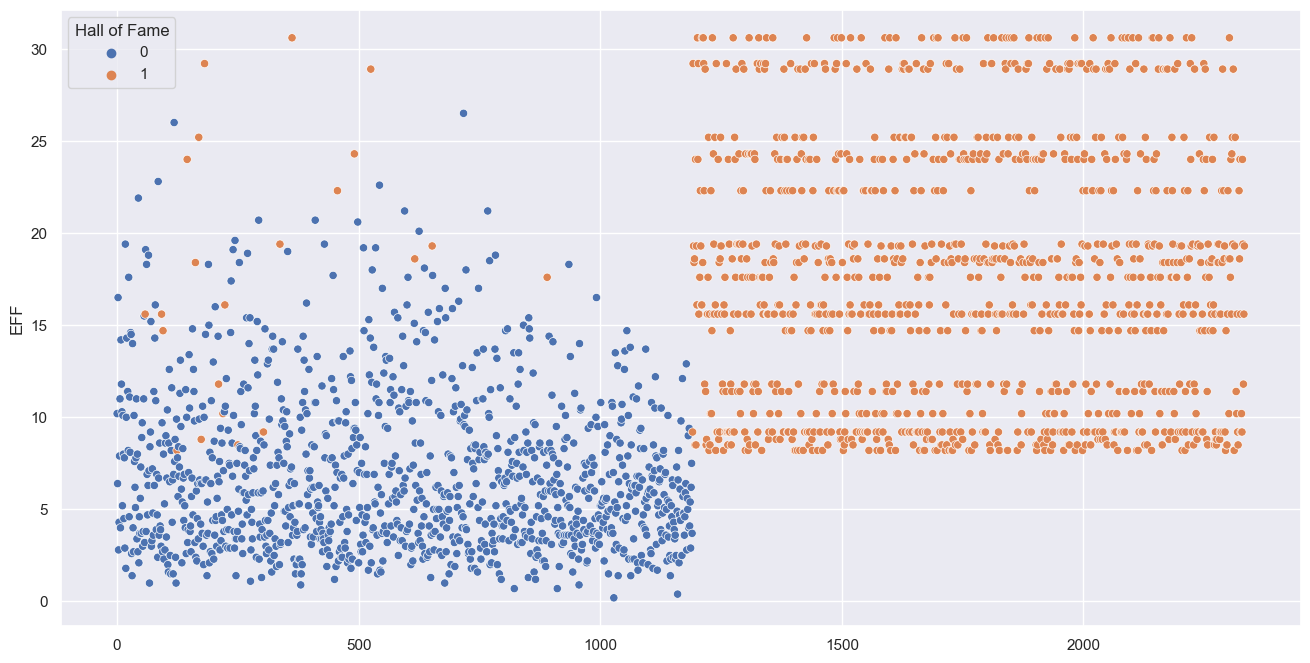

In [36]:
f = plt.figure(figsize=(16, 8))
sb.scatterplot(data=data_OS, x=data_OS.index, y='EFF', hue='Hall of Fame')
data_OS.corr()

Correlation between **EFF** and **Hall of Fame** = **0.676**

,index,Year Drafted,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,...,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,EFF,Hall of Fame
index,1.000000,0.998773,-0.444667,-0.279457,-0.336440,-0.374021,-0.338490,-0.376901,0.383823,0.382051,...,0.042225,-0.289017,-0.159187,-0.207929,-0.274572,-0.397792,-0.140624,-0.370624,-0.319259,-0.495969
Year Drafted,0.998773,1.000000,-0.452008,-0.292586,-0.350732,-0.387612,-0.351934,-0.384100,0.378541,0.376935,...,0.042209,-0.299674,-0.173882,-0.221564,-0.281928,-0.401140,-0.153939,-0.385811,-0.333605,-0.509902
GP,-0.444667,-0.452008,1.000000,0.674750,0.620271,0.634959,0.615977,0.516747,-0.006906,-0.016911,...,0.137625,0.530944,0.502815,0.523728,0.425394,0.523305,0.394454,0.621705,0.633593,0.611744
MIN,-0.279457,-0.292586,0.674750,1.000000,0.938549,0.934661,0.943343,0.467624,0.153329,0.159628,...,0.162920,0.751723,0.789783,0.793684,0.571094,0.676248,0.630677,0.913450,0.925280,0.657409
PTS,-0.336440,-0.350732,0.620271,0.938549,1.000000,0.992604,0.983470,0.515781,0.093723,0.101109,...,0.185742,0.753918,0.793705,0.796894,0.513730,0.663680,0.660812,0.917056,0.963500,0.716526
FGM,-0.374021,-0.387612,0.634959,0.934661,0.992604,1.000000,0.986695,0.541546,0.054922,0.062057,...,0.141721,0.766521,0.789389,0.798269,0.496990,0.662464,0.644785,0.912685,0.953593,0.720427
FGA,-0.338490,-0.351934,0.615977,0.943343,0.983470,0.986695,1.000000,0.431478,0.152098,0.165839,...,0.181440,0.701176,0.735568,0.738923,0.562610,0.689214,0.581293,0.918227,0.917142,0.679749
FG%,-0.376901,-0.384100,0.516747,0.467624,0.515781,0.541546,0.431478,1.000000,-0.304885,-0.339133,...,-0.109992,0.629675,0.564997,0.601509,0.034825,0.258419,0.505825,0.434709,0.600382,0.548287
3P Made,0.383823,0.378541,-0.006906,0.153329,0.093723,0.054922,0.152098,-0.304885,1.000000,0.988406,...,0.261179,-0.227986,-0.115837,-0.157833,0.299333,0.137955,-0.197425,0.078565,-0.020288,-0.112793
3PA,0.382051,0.376935,-0.016911,0.159628,0.101109,0.062057,0.165839,-0.339133,0.988406,1.000000,...,0.270351,-0.243966,-0.131512,-0.174017,0.334527,0.176633,-0.217894,0.090373,-0.021189,-0.116831


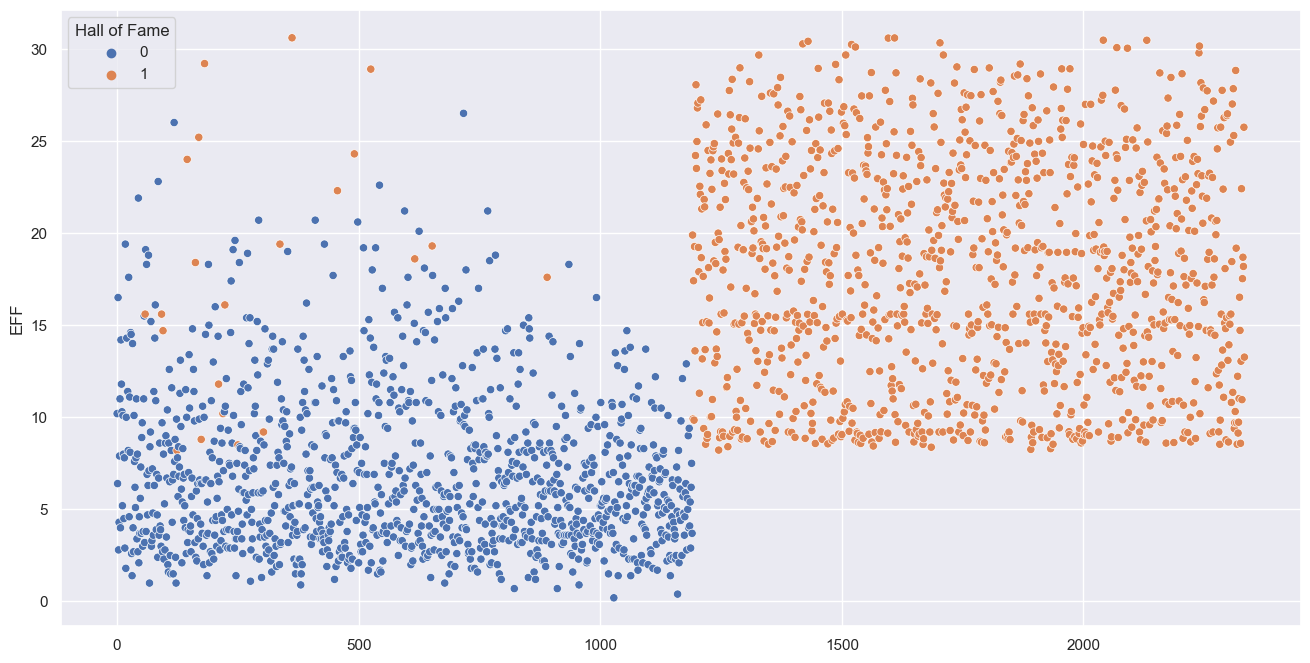

In [37]:
f = plt.figure(figsize=(16, 8))
sb.scatterplot(data=data_SM, x=data_SM.index, y='EFF', hue='Hall of Fame')
data_SM.corr()

Correlation between **EFF** and **Hall of Fame** = **0.723**

Considering the disadvantages of Undersampling and Oversampling, **SMOTE** will be the best way to balance our dataset, furthermore, **SMOTE** has the highest correlation between **EFF** and **Hall of Fame** among the 3 methods.

## Model Building

We will look into 4 classification machine learning models to see which is the best in helping us predict which rookie end up in the NBA hall of fame.

The 4 models we will be using are: **Logistic Regression**, **Random Forest Classifier**, **K-Nearest Neighbour** and **XGBoost**

In [38]:
#Combine the SM data and split again
data_SM = pd.concat([X_SM, y_SM],axis=1)

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_SM,y_SM,test_size=0.2,random_state=12345)

In [40]:
## Assuming the positive are N and negative are Y 
## Function to get TPR(True Positive Rate) and FPR(False Positive Rate)
def get_TPR(actual, prediction):
    TP = confusion_matrix(actual, prediction)[1][1]
    FN = confusion_matrix(actual, prediction)[1][0]
    TPR = (TP/(TP+FN))
    
    return TPR
    
def get_FPR(actual, prediction):
    FP = confusion_matrix(actual, prediction)[0][1]
    TN = confusion_matrix(actual, prediction)[0][0]
    FPR = (FP/(FP+TN))
    
    return FPR

## Logistic Regression

In [41]:
from sklearn.linear_model import LogisticRegression
logR = LogisticRegression(max_iter=5000)
logR.fit(X_train,y_train.values.ravel())

logR_train_pred=logR.predict(X_train)
logR_test_pred=logR.predict(X_test)

Logistic Regression Confusion Matrix (Train)
Classification Accuracy:  0.9469737546866631
TPR:  0.9778947368421053
FPR:  0.08505997818974918


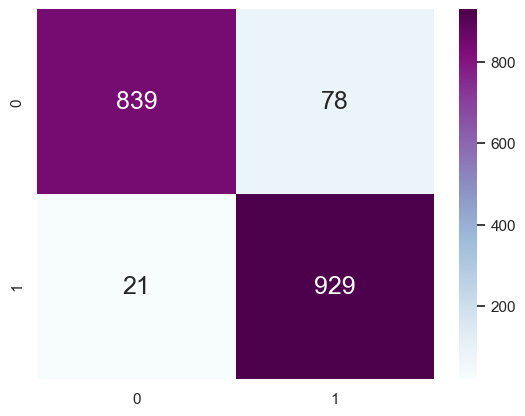

In [42]:
from sklearn.metrics import confusion_matrix
print("Logistic Regression Confusion Matrix (Train)")
sb.heatmap(confusion_matrix(y_train, logR_train_pred), 
           annot=True, fmt='.0f', annot_kws={"size":18}, cmap='BuPu')

print("Classification Accuracy: ", logR.score(X_train, y_train))
print('TPR: ', get_TPR(y_train, logR_train_pred))
print('FPR: ', get_FPR(y_train, logR_train_pred))

Logistic Regression Confusion Matrix (Test)
Classification Accuracy:  0.9507494646680942
TPR:  0.9861751152073732
FPR:  0.08


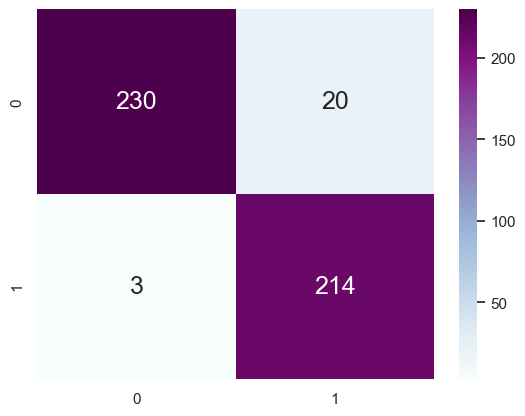

In [43]:
print("Logistic Regression Confusion Matrix (Test)")
sb.heatmap(confusion_matrix(y_test, logR_test_pred), 
           annot=True, fmt='.0f', annot_kws={"size":18}, cmap='BuPu')

print("Classification Accuracy: ", logR.score(X_test, y_test))
print('TPR: ', get_TPR(y_test, logR_test_pred))
print('FPR: ', get_FPR(y_test, logR_test_pred))

In [44]:
# F1 Score
from sklearn.metrics import f1_score
print('Logistic Regression TRAIN F1 Score: {}'.format(f1_score(y_train,logR_train_pred)))
print('Logistic Regression TEST F1 Score: {}'.format(f1_score(y_test,logR_test_pred)))

Logistic Regression TRAIN F1 Score: 0.9494123658661217
Logistic Regression TEST F1 Score: 0.9490022172949002


## Random Forest Classifier

In [45]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(max_depth=4)
rfc.fit(X_train,y_train.values.ravel())

rfc_train_pred = rfc.predict(X_train)
rfc_test_pred = rfc.predict(X_test)

Random Forest Classifier Confusion Matrix (Train)
Classification Accuracy:  0.9528655597214784
TPR:  1.0
FPR:  0.09596510359869138


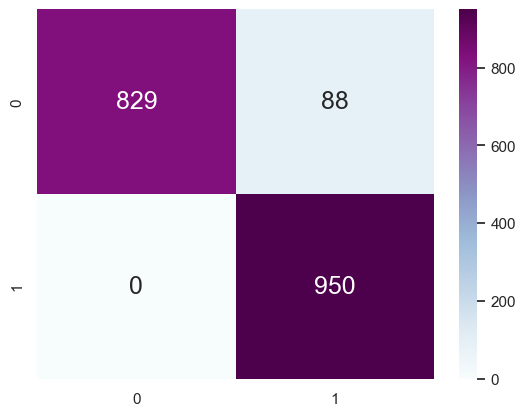

In [46]:
print("Random Forest Classifier Confusion Matrix (Train)")
sb.heatmap(confusion_matrix(y_train, rfc_train_pred), 
           annot=True, fmt='.0f', annot_kws={"size":18}, cmap='BuPu')

print("Classification Accuracy: ", rfc.score(X_train, y_train))
print('TPR: ', get_TPR(y_train, rfc_train_pred))
print('FPR: ', get_FPR(y_train, rfc_train_pred))

Random Forest Classifier Confusion Matrix (Test)
Classification Accuracy:  0.961456102783726
TPR:  0.9953917050691244
FPR:  0.068


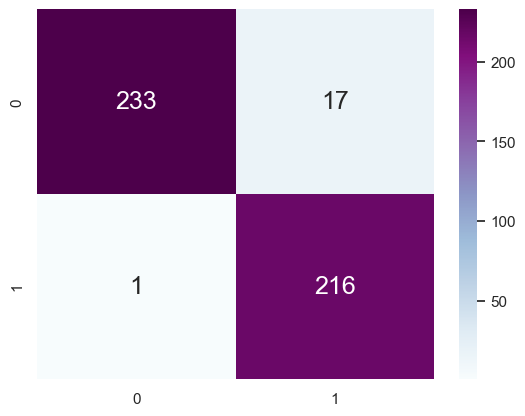

In [47]:
print("Random Forest Classifier Confusion Matrix (Test)")
sb.heatmap(confusion_matrix(y_test, rfc_test_pred), 
           annot=True, fmt='.0f', annot_kws={"size":18}, cmap='BuPu')

print("Classification Accuracy: ", rfc.score(X_test, y_test))
print('TPR: ', get_TPR(y_test, rfc_test_pred))
print('FPR: ', get_FPR(y_test, rfc_test_pred))

In [48]:
# F1 Score
print('Random Forest Classifier TRAIN F1 Score: {}'.format(f1_score(y_train,rfc_train_pred)))
print('Random Forest Classifier TEST F1 Score: {}'.format(f1_score(y_test,rfc_test_pred)))

Random Forest Classifier TRAIN F1 Score: 0.9557344064386317
Random Forest Classifier TEST F1 Score: 0.9600000000000001


## K-Nearest Neighbour

In [49]:
from sklearn.neighbors import KNeighborsClassifier
n=2
knn=KNeighborsClassifier(n_neighbors=n)
knn.fit(X_train, y_train.values.ravel())

knn_train_pred = knn.predict(X_train)
knn_test_pred = knn.predict(X_test)

K-Nearest Neighbors Confusion Matrix (Train)
Classification Accuracy:  0.9962506695232994
TPR:  0.9926315789473684
FPR:  0.0


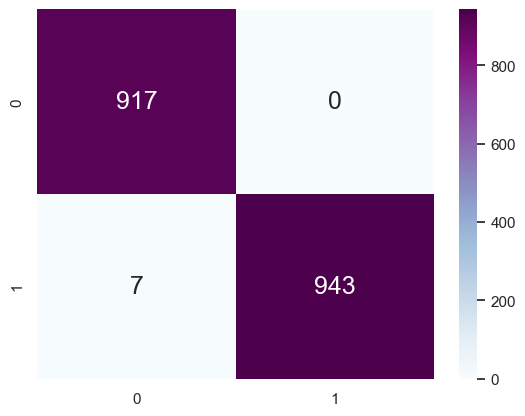

In [50]:
print("K-Nearest Neighbors Confusion Matrix (Train)")
sb.heatmap(confusion_matrix(y_train, knn_train_pred), 
           annot=True, fmt='.0f', annot_kws={"size":18}, cmap='BuPu')

print("Classification Accuracy: ", knn.score(X_train, y_train))
print('TPR: ', get_TPR(y_train, knn_train_pred))
print('FPR: ', get_FPR(y_train, knn_train_pred))

K-Nearest Neighbors Confusion Matrix (Test)
Classification Accuracy:  0.9785867237687366
TPR:  0.9861751152073732
FPR:  0.028


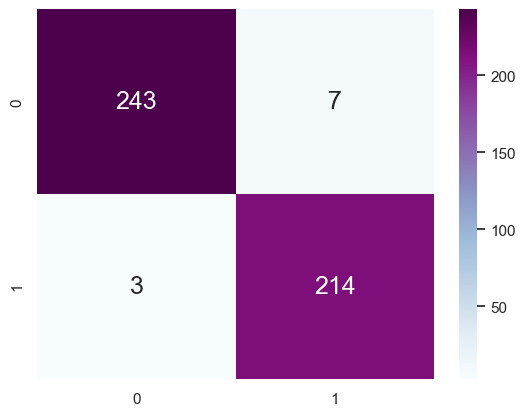

In [51]:
print("K-Nearest Neighbors Confusion Matrix (Test)")
sb.heatmap(confusion_matrix(y_test, knn_test_pred), 
           annot=True, fmt='.0f', annot_kws={"size":18}, cmap='BuPu')

print("Classification Accuracy: ", knn.score(X_test, y_test))
print('TPR: ', get_TPR(y_test, knn_test_pred))
print('FPR: ', get_FPR(y_test, knn_test_pred))

In [52]:
# F1 Score
print('K-Nearest Neighbors TRAIN F1 Score: {}'.format(f1_score(y_train,knn_train_pred)))
print('K-Nearest Neighbors TEST F1 Score: {}'.format(f1_score(y_test,knn_test_pred)))

K-Nearest Neighbors TRAIN F1 Score: 0.9963021658742736
K-Nearest Neighbors TEST F1 Score: 0.9771689497716893


## XGBoost

Unlike random forest which uses the technique of bagging, XGBoost uses the techniqueboosting. Boosting involves using trees with fewer splits. Boosting uses an ensemble technique which involves the following steps:

- An initial model F0 is defined to predict the target variable y. This model will be associated with a residual (y – F0)
- A new model h1 is fit to the residuals from the previous step
- Now, F0 and h1 are combined to give F1, the boosted version of F0. The mean squared error from F1 will be lower than that from F0

Reference: https://www.analyticsvidhya.com/blog/2018/09/an-end-to-end-guide-to-understand-the-math-behind-xgboost/

In [53]:
import xgboost as xgb
from xgboost import XGBClassifier

In [54]:
xgbc = XGBClassifier(
         eval_metric='aucpr')
xgbc.fit(X_train, y_train)

xgbc_train_pred = xgbc.predict(X_train)
xgbc_test_pred = xgbc.predict(X_test)

XGBoost Classifier Confusion Matrix (Train)
Classification Accuracy:  1.0
TPR:  1.0
FPR:  0.0


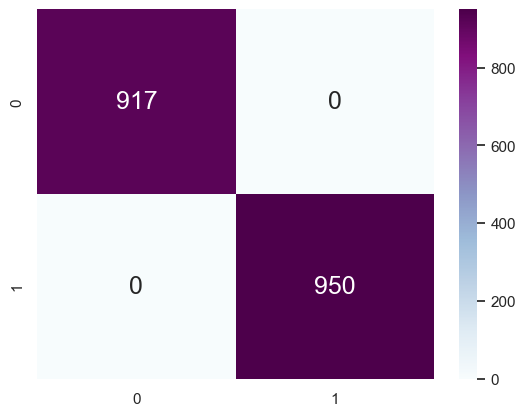

In [55]:
print("XGBoost Classifier Confusion Matrix (Train)")
sb.heatmap(confusion_matrix(y_train, xgbc_train_pred), 
           annot=True, fmt='.0f', annot_kws={"size":18}, cmap='BuPu')

print("Classification Accuracy: ", xgbc.score(X_train, y_train))
print('TPR: ', get_TPR(y_train, xgbc_train_pred))
print('FPR: ', get_FPR(y_train, xgbc_train_pred))

XGBoost Classifier Confusion Matrix (Test)
Classification Accuracy:  0.9892933618843683
TPR:  0.9953917050691244
FPR:  0.016


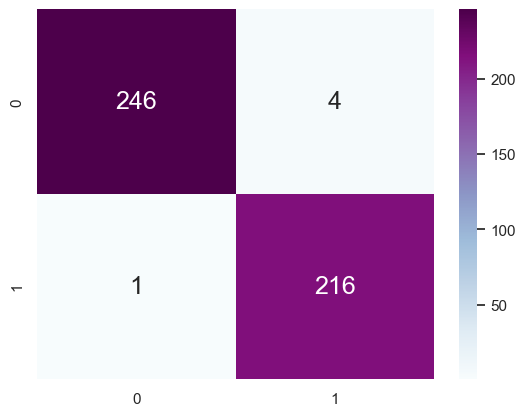

In [56]:
print("XGBoost Classifier Confusion Matrix (Test)")
sb.heatmap(confusion_matrix(y_test, xgbc_test_pred), 
           annot=True, fmt='.0f', annot_kws={"size":18}, cmap='BuPu')

print("Classification Accuracy: ", xgbc.score(X_test, y_test))
print('TPR: ', get_TPR(y_test, xgbc_test_pred))
print('FPR: ', get_FPR(y_test, xgbc_test_pred))

In [57]:
# F1 Score
print('XGBoost TRAIN F1 Score: {}'.format(f1_score(y_train,xgbc_train_pred)))
print('XGBoost TEST F1 Score: {}'.format(f1_score(y_test,xgbc_test_pred)))

XGBoost TRAIN F1 Score: 1.0
XGBoost TEST F1 Score: 0.9885583524027459


## Analysis

Based on the 4 models that we have used, we determine which model is the most effective by looking at these few indicators:
1) **Classification Accuracy**
 - Describes the overall performance of the classification model based on FN,TN,FP,TP
 
2) **True Positive Rate (TPR)**
 - TPR = TP/(TP + FN)
 
3) **False Positive Rate (FPR)**
 - FPR = FP/(FP + TN)

4) **F1 Score**
 - A weighted harmonic mean of precision and recall
 - F1 = 2 * (Precision * Recall) / (Precision + Recall)
 
### Classification Accuracy
**XGBoost** has the highest classification accuracy for both the **train** (1) and **test** datasets (0.989)

### TPR
**XGBoost** has the highest TPR for both the **train** (1) and **test** datasets (0.995)

### FPR
**XGBoost** has the lowest FPR for both the **train** (0) and **test** datasets (0.016)

### F1 Score
**XGBoost** has the higher F1 Scores for both the **train** (1) and **test** datasets (0.989)

## Conclusion

Based on the various indicators, **XGBoost** is the best and most suitable machine learning model to determine if a player will make it into the NBA hall of fame based on their rookie statistics.

## Using the model on the dataset of non-retired players

We will now utilise the K-Nearest Neighbour machine learning model to predict which **non-retired player** will make it into the hall of fame based on their rookie statistics.

In [58]:
rookiedata_active.drop(['Hall of Fame', 'Retired'], axis=1, inplace=True)
rookiedata_active

,index,Name,Year Drafted,GP,MIN,PTS,FGM,FGA,FG%,3P Made,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,EFF
0,775,Dirk Nowitzki,1998,47.0,20.4,8.2,2.9,7.1,40.5,0.3,...,2.7,77.3,0.9,2.6,3.4,1.0,0.6,0.6,1.6,7.4
1,801,Vince Carter,1998,50.0,35.2,18.3,6.9,15.3,45.0,0.4,...,5.4,76.1,1.9,3.8,5.7,3.0,1.1,1.5,2.2,17.6
2,816,Jason Terry,1999,81.0,23.3,8.1,3.1,7.4,41.5,0.6,...,1.7,80.7,0.3,1.8,2.0,4.3,1.1,0.1,1.9,9.1
3,851,Jamal Crawford,2000,61.0,17.2,4.6,1.8,5.0,35.2,0.7,...,0.6,79.4,0.1,1.3,1.5,2.3,0.7,0.2,1.4,4.6
4,885,Joe Johnson,2001,77.0,24.9,7.5,3.3,7.6,43.0,0.5,...,0.7,77.4,1.0,2.4,3.3,2.3,0.8,0.3,0.9,8.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266,1527,Pascal Siakam,2016,32.0,17.8,5.1,2.3,4.3,52.5,0.0,...,0.7,77.3,1.3,2.2,3.5,0.4,0.5,0.8,0.7,7.4
267,1528,Patrick McCaw,2016,26.0,12.2,2.8,1.1,2.8,38.9,0.6,...,0.2,50.0,0.3,0.8,1.0,1.0,0.4,0.3,0.6,3.2
268,1533,Tomas Satoransky,2016,23.0,14.7,3.1,1.3,3.2,39.7,0.1,...,0.7,64.7,0.4,1.1,1.5,2.2,0.5,0.0,0.9,4.2
269,1534,Troy Williams,2016,24.0,17.4,5.3,2.1,5.1,41.8,0.4,...,1.0,60.0,0.3,1.6,1.8,0.8,1.0,0.4,1.1,4.8


In [59]:
active_players = rookiedata_active[['Name']]
rookiedata_active1 = rookiedata_active.drop('Name', axis=1)
xgbc_active = xgbc.predict(rookiedata_active1)

In [60]:
for x, y in enumerate(knn_active):
    if y == 0:
        rookiedata_active1.drop([x], inplace=True)
        
rookiedata_active1

,index,Year Drafted,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,EFF
5,890,2001,82.0,36.7,17.6,6.7,13.0,51.8,0.0,0.1,...,5.8,70.9,2.9,6.0,8.9,2.7,0.5,2.1,2.7,21.1
15,967,2003,79.0,39.5,20.9,7.9,18.9,41.7,0.8,2.7,...,5.8,75.4,1.3,4.2,5.5,5.9,1.6,0.7,3.5,18.8
98,1244,2010,82.0,38.0,22.5,8.5,16.8,50.6,0.1,0.3,...,8.5,64.2,3.3,8.8,12.1,3.8,0.8,0.6,2.7,25.6
131,1315,2011,51.0,30.5,18.5,6.9,14.6,46.9,1.4,3.6,...,3.8,87.2,0.9,2.9,3.7,5.4,1.1,0.4,3.1,17.7
227,1483,2015,82.0,32.0,18.3,7.6,14.1,54.2,0.4,1.1,...,3.4,81.1,2.8,7.7,10.5,2.0,0.7,1.7,2.2,23.8
258,1519,2016,22.0,24.8,18.9,6.2,13.4,46.4,1.2,3.0,...,6.8,77.3,2.0,5.4,7.3,1.9,0.8,2.4,3.8,18.8


In [61]:
df1 = rookiedata_active1.join(active_players)
df1

,index,Year Drafted,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,...,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,EFF,Name
5,890,2001,82.0,36.7,17.6,6.7,13.0,51.8,0.0,0.1,...,70.9,2.9,6.0,8.9,2.7,0.5,2.1,2.7,21.1,Pau Gasol
15,967,2003,79.0,39.5,20.9,7.9,18.9,41.7,0.8,2.7,...,75.4,1.3,4.2,5.5,5.9,1.6,0.7,3.5,18.8,LeBron James
98,1244,2010,82.0,38.0,22.5,8.5,16.8,50.6,0.1,0.3,...,64.2,3.3,8.8,12.1,3.8,0.8,0.6,2.7,25.6,Blake Griffin
131,1315,2011,51.0,30.5,18.5,6.9,14.6,46.9,1.4,3.6,...,87.2,0.9,2.9,3.7,5.4,1.1,0.4,3.1,17.7,Kyrie Irving
227,1483,2015,82.0,32.0,18.3,7.6,14.1,54.2,0.4,1.1,...,81.1,2.8,7.7,10.5,2.0,0.7,1.7,2.2,23.8,Karl-Anthony Towns
258,1519,2016,22.0,24.8,18.9,6.2,13.4,46.4,1.2,3.0,...,77.3,2.0,5.4,7.3,1.9,0.8,2.4,3.8,18.8,Joel Embiid


**Using XGBoost machine learning model, we conclude that the following players are predicted to make it into the NBA hall of fame based on their rookie statistics:**

- Pau Gasol
- Lebron James
- Blake Griffin
- Kyrie Irving
- Karl-Anthony Towns
- Joel Embiid